## Analysis

### Importing our snakes_and_ladders file

In [1]:
# load snakes_and_ladders

__author__ = 'Lisa Hoff, Elinor Brede Skårås'
__email__ = 'lisast@nmbu.no, elinor2511@gmail.com'

import random
import math


def roll_dice():
    """
    Returns random number of dice.
    """
    return random.randint(1, 6)


def move_position(position):
    """
    Roll the dice, and moves the position. 
    Checks if the new position is on a ladder or snake and if that´s the case 
    then the position is changed either up or down 
    
    :param position: original position
    :return: new_position: new position after one throw
    """
    ladders_snakes = {1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85,
                      24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70}

    throw = roll_dice()
    position += throw

    if position in ladders_snakes:
        position = ladders_snakes[position]

    return position


def end_of_game(positions):
    """
    Returns True when one player has reached the goal. (position >= 90)
    :param positions:
    :return: 
    """
    for number in positions:
        if number >= 90:
            return True


def single_game(num_players):
    """
    Returns duration of single game.

    Arguments
    ---------
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : int
        Number of moves the winning player needed to reach the goal
    """

    positions = [0] * num_players
    num_moves = 0

    while end_of_game(positions) is not True:
        num_moves += 1
        for player in range(num_players):
            positions[player] = move_position(positions[player])
    return num_moves


def multiple_games(num_games, num_players):
    """
    Returns durations of a number of games.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """

    num_moves = []
    for game in range(num_games):
        moves_single_game = single_game(num_players)
        num_moves.append(moves_single_game)
    return num_moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """
    random.seed(seed)

    num_moves = []
    for game in range(num_games):
        moves_single_game = single_game(num_players)
        num_moves.append(moves_single_game)
    return num_moves


def standard_deviation(data, mean):
    std_d = 0
    for number in data:
        std_d += (number - mean) ** 2
    std_d = math.sqrt(std_d / (len(data)))

    return std_d


if __name__ == '__main__':
    test_games = multi_game_experiment(100, 4, 2)

    mean_dur = sum(test_games)/100

    print('The shortest game duration', min(test_games))
    print('The longest game duration', max(test_games))
    print('The median game duration', sorted(test_games)[50])
    print('The mean game duration', mean_dur)
    print('standard deviation', standard_deviation(test_games, mean_dur))


The shortest game duration 5
The longest game duration 56
The median game duration 16
The mean game duration 17.33
standard deviation 8.555764138871526


### Executing the analysis

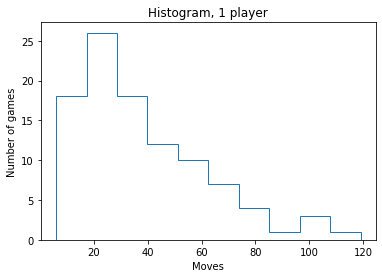

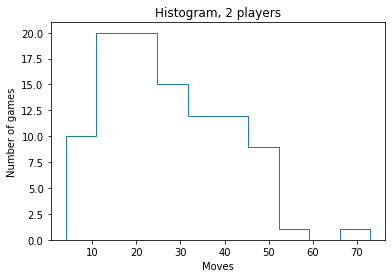

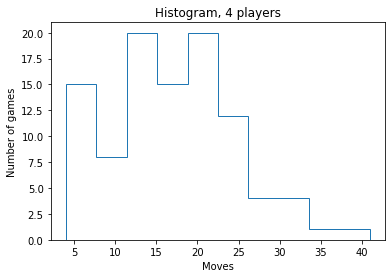

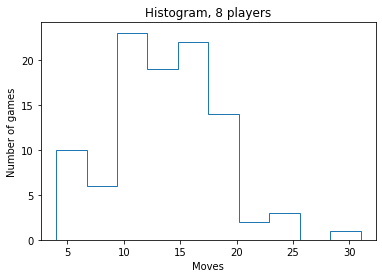

In [3]:
one_player = multiple_games(100, 1)
two_players = multiple_games(100, 2)
four_players = multiple_games(100, 4)
eight_players = multiple_games(100, 8)

from matplotlib import pyplot as plt


plt.hist(one_player, bins = 10, histtype = 'step')
plt.title('Histogram, 1 player')
plt.ylabel('Number of games')
plt.xlabel('Moves')
plt.show()
plt.close()

plt.hist(two_players, bins = 10, histtype = 'step')
plt.title('Histogram, 2 players')
plt.ylabel('Number of games')
plt.xlabel('Moves')
plt.show()
plt.close()
    
plt.hist(four_players, bins = 10, histtype = 'step')
plt.title('Histogram, 4 players')
plt.ylabel('Number of games')
plt.xlabel('Moves')
plt.show()
plt.close()

plt.hist(eight_players, bins = 10, histtype = 'step')
plt.title('Histogram, 8 players')
plt.ylabel('Number of games')
plt.xlabel('Moves')
plt.show()
plt.close()
